In [1]:
'''
    확률적 경사하강법(Stochatic Gradient Descent )- 다중분류(multi-class classification)
    
    - 샘플을 하나씩 추출해서 훈련하는 방법.
    - 사이킷런은 미니배치와 배치 경사하강법 지원 안함.
    
    - 손실함수
      가. 분류
              -이진분류: 이진 크로스 엔트로피 ( binary cross entropy) 손실함수
              -다중분류: 크로스 엔트로피 (cross entropy) 손실함수
              
      나. 회귀
             - MSE
             - MAE
    
    - 기본적으로 max_iter = 500 지정된 만큼 반복하지 않는다.
    내부적으로 loss 값이 좋아지지 않으면 중단된다.
    얼마만큼 좋아지지 않으면? (loss > best_loss - tol)
    
    
    몇 번 반복했을 때 좋아지지 않았는지 ? => default 5번
    
    tol=None 지정하면 무조건 max_iter 횟수만큼 실행된다.
    
    ==> 결론은 위의 파라미터에 크게 신경쓰지 말고 임의의 모델은
        훈련중에 loss가 더 이상 나아지지 않으면 중간에 중단시키는 모델도 존재 
'''


'\n    확률적 경사하강법(Stochatic Gradient Descent )- 다중분류(multi-class classification)\n    \n    - 샘플을 하나씩 추출해서 훈련하는 방법.\n    - 사이킷런은 미니배치와 배치 경사하강법 지원 안함.\n    \n    - 손실함수\n      가. 분류\n              -이진분류: 이진 크로스 엔트로피 ( binary cross entropy) 손실함수\n              -다중분류: 크로스 엔트로피 (cross entropy) 손실함수\n              \n      나. 회귀\n             - MSE\n             - MAE\n    \n    \n'

In [2]:
import numpy as np
import pandas as pd

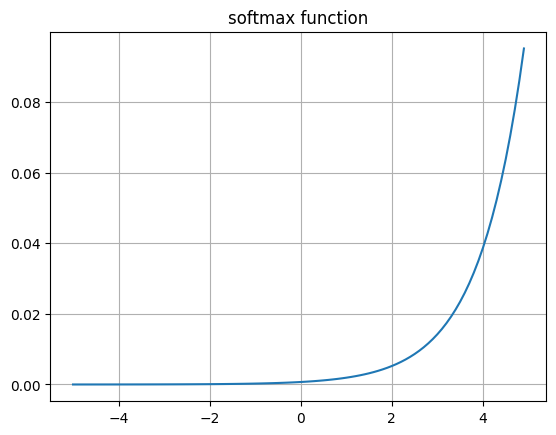

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
x = np.arange(-5,5,0.1)
y = tf.nn.softmax(x)
plt.plot(x, y)
plt.grid()
plt.title("softmax function")
plt.show()


In [4]:
### a1과 a2 비교 했을 때 훨씬 값이 큰 a1이 잘 예측했다고 할 수 있다.
# a1값들이 서로 큰 차이가 없기 때문에 결과는 언제든 달라질 수 있다. ==> ML 입장에서는 안 좋다.
# a2값들은 서로 간의 큰 차이가 있기 때문에 결과가 달라질 확률이 적다. ==> ML 입장에서는 좋다. 
a1 = np.array([0.9, 0.8, 0.7])
a2 = np.array([0.5, 0.2, 0.1]) 
y1 = tf.nn.softmax(a1) #array([0.3671654 , 0.33222499, 0.30060961])
y2 = tf.nn.softmax(a2) #array([0.41474187, 0.30724834, 0.27800979])
y1,y2

(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.3671654 , 0.33222499, 0.30060961])>,
 <tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.41474187, 0.30724834, 0.27800979])>)

In [5]:
df = pd.read_csv(r"C:\Users\YB\Desktop\tf24_study\csv\fish.csv")
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### 2. 입력데이터와 label 작성

In [7]:
fish_data = df.iloc[:,1:]
fish_target = df.iloc[:,0]

In [8]:
fish_data.shape, fish_target.shape

((159, 5), (159,))

### 3. 훈련데이터와 테스트 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test=train_test_split(fish_data, fish_target, test_size=0.2, random_state=1,stratify=fish_target)

In [11]:
### 총 159개 중에 127개가 훈련 데이터
X_train.shape,y_train.shape

((127, 5), (127,))

In [12]:
### 총 159개 중에 32개가 테스트 데이터
X_test.shape, y_test.shape

((32, 5), (32,))

### 4. 표준화

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### 5. 모델 생성

In [16]:
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [24]:
# 1.0 이하는 warning 발생  ==> 'log'변경하면 warining 제거용
# max_iter epoch(에포크)
lr = SGDClassifier(loss = 'log_loss',random_state=42,max_iter=500,tol=None) 
lr.fit(X_train_scaled,y_train)

SGDClassifier(loss='log_loss', max_iter=500, random_state=42, tol=None)

In [18]:
!pip list

Package                 Version
----------------------- ------------
absl-py                 0.15.0
anyio                   3.5.0
argon2-cffi             21.3.0
argon2-cffi-bindings    21.2.0
asttokens               2.0.8
astunparse              1.6.3
attrs                   21.4.0
Babel                   2.9.1
backcall                0.2.0
backports.zoneinfo      0.2.1
beautifulsoup4          4.11.1
bleach                  4.1.0
branca                  0.5.0
brotlipy                0.7.0
cachetools              5.2.0
certifi                 2022.9.24
cffi                    1.15.1
charset-normalizer      2.1.1
colorama                0.4.5
contourpy               1.0.5
cryptography            37.0.1
cycler                  0.11.0
debugpy                 1.6.3
decorator               5.1.1
defusedxml              0.7.1
entrypoints             0.4
executing               1.1.0
fastjsonschema          2.16.2
flatbuffers             1.12
folium                  0.12.1.post1
fonttools     

### 반복횟수

In [25]:
lr.n_iter_

500

### 6. 예측

In [26]:
pred = lr.predict(X_test_scaled[:5])
pred # 새 데이터를 넣어줬더니 예측함

array(['Roach', 'Bream', 'Bream', 'Parkki', 'Roach'], dtype='<U9')

### 7. 평가

In [30]:
lr.score(X_test_scaled,y_test)

0.9375

### 기존 모델에 추가로 ...1epoch만 더 실행 가능한 메서드

In [32]:
lr.partial_fit(X_test_scaled,y_test)

SGDClassifier(loss='log_loss', max_iter=500, random_state=42, tol=None)

In [34]:
lr.score(X_test_scaled,y_test)

0.9375

### 과적합이 발생가능한 경우

* 훈련이 너무 많이 되었을 때 ==> epoch를 많이 했다는 의미이다.
* 모델이 복잡할 때

### 최적의epoch 횟수는 얼마인가?

In [49]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=1, tol=None)


train_score = []
test_score = []
classes = np.unique(y_train)
print(classes) # ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
# 훈련
for _ in range(0, 600):
    sc.partial_fit(X_train_scaled, y_train, classes=classes)

    train_score.append(sc.score(X_train_scaled, y_train))
    test_score.append(sc.score(X_test_scaled, y_test))


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


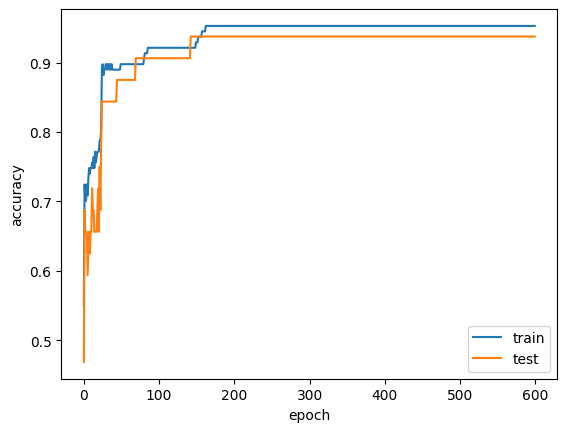

In [50]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(["train","test"])
plt.show()

### 최적의 epoch  => 200 로 간주하고 다시 훈련
* 200이상 훈련하면 과대적합이 발생할 확률만 높아진다. 따라서 훈련데이터의 테스트 데이터는 epoch =200 값이 최적의 값으로 판단된다.

In [55]:
lr = SGDClassifier(loss = 'log_loss',random_state=42,max_iter=200,tol=None) 
lr.fit(X_train_scaled,y_train)

SGDClassifier(loss='log_loss', max_iter=200, random_state=42, tol=None)

In [56]:
lr.score(X_train_scaled,y_train)

0.937007874015748

In [60]:
lr.score(X_test_scaled,y_test)

0.9375